In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import random
from matplotlib import pyplot as plt
from image_utils import draw_lines, draw_lines_polar

In [2]:
img = cv2.imread('football.png')
print(img.size)
cv2.imshow('image', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

167256


In [3]:
#Aplicamos filtro gaussiano para eliminar ruido
filter_size = 5 #El filtro tiene que ser numero impar
img_gauss = cv2.GaussianBlur(img,(filter_size,filter_size), sigmaX=1)
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

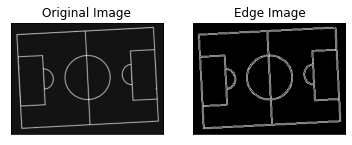

In [4]:
##https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
img = cv2.imread('football.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

55752

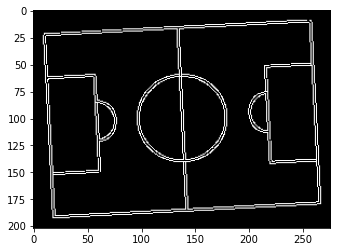

In [6]:
shape = edges.shape

width = shape[0]
length = shape[1]

plt.imshow(edges,cmap = 'gray')
# plt.axis([0, 300, 0, 300])
202*276

In [7]:
border_coordinates = []

for x in range(len(edges)):
    for y in range(len(edges[x])):
        
        if(edges[x][y] > 0): border_coordinates.append((y,x))

In [8]:
# x = []
# y = []


# for coordinate in border_coordinates:
#     x.append(coordinate[0])
#     y.append(coordinate[1])

# plt.plot(x,y, 'ro')
# # plt.axis([0, largo, 0, ancho])
# plt.show()

In [9]:

def calcular_recta(a,b):
    
    m = (b[1]-a[1])/(b[0]-a[0])
    b = a[1] - m*a[0]
    return(m, b)
    
def calcular_inliner(recta, punto, tolerance):

    m = recta[0]
    b = recta[1]
    y = m*punto[0] + b

    if(abs(y - punto[1]) < tolerance): return True
    else: return False
    #valor = punto[1] - m*punto[0]
    #if(abs(valor - b) < tolerancia): return True
    
def total_inliners(rect, tolerance, border_coordinates):
    inliners = 0
    for point in border_coordinates:
        if(calcular_inliner(rect, point, tolerance)): inliners+= 1
    return inliners

In [10]:
recta = calcular_recta([1,2],[3,4])
print(f'y = {recta[0]}x + {recta[1]}')
'''
print(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')
print(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')
'''

y = 1.0x + 1.0


"\nprint(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')\nprint(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')\n"

In [11]:

a = border_coordinates[random.randint(0, len(border_coordinates) - 1)]
b = border_coordinates[random.randint(0, len(border_coordinates) - 1)]
recta = calcular_recta(a,b)
inliners = total_inliners(recta, 10, border_coordinates)
print(a,b)
#print(f"Recta: {recta[0]}x + {recta[1]}y = {-recta[2]}")
print(f'y = {recta[0]}x + {recta[1]}')
print("Inliners: ", inliners)

(36, 60) (101, 80)
y = 0.3076923076923077x + 48.92307692307692
Inliners:  400


In [12]:

def ransac(edges_points, iterations, inliners_needed, tolerance):

    rectas = []

    for x in range(0, iterations):

        a = edges_points[random.randint(0, len(edges_points) -1)]
        b = edges_points[random.randint(0, len(edges_points) -1)]
        
        #print(a,b)
        if(a[0] != b[0]):
            r = calcular_recta(a,b)
            inliners = total_inliners(r, tolerance, edges_points)

            if(inliners >= inliners_needed): rectas.append(r)
    
    return rectas

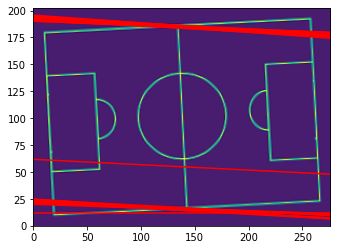

In [13]:
result = ransac(border_coordinates, 1000, 30, 0.15)

#for r in x:
#    print(f'y = {recta[0]}x + {recta[1]}')

draw_lines(img,result)

[(-0.04032258064516129, 190.07258064516128), (-0.05555555555555555, 22.27777777777778), (-0.037037037037037035, 190.11111111111111), (-0.03571428571428571, 20.0), (-0.05357142857142857, 24.339285714285715), (-0.03546099290780142, 21.134751773049647), (-0.07207207207207207, 194.17117117117118), (-0.06282722513089005, 23.89005235602094), (-0.046511627906976744, 190.48837209302326), (-0.06299212598425197, 194.75590551181102), (-0.056451612903225805, 22.016129032258064), (-0.061224489795918366, 193.28571428571428), (-0.049723756906077346, 192.939226519337), (-0.0547945205479452, 191.4931506849315), (-0.0641025641025641, 193.7948717948718), (-0.04878048780487805, 23.170731707317074), (-0.060240963855421686, 191.83132530120483), (-0.06018518518518518, 193.38425925925927), (-0.07142857142857142, 195.07142857142858), (-0.0, 12.0), (-0.0635593220338983, 193.77966101694915), (-0.05333333333333334, 191.02666666666667), (-0.050505050505050504, 21.434343434343432), (-0.06578947368421052, 24.9210526

In [ ]:
print(result)